In [24]:
import sklearn
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from datetime import datetime
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
import pickle
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


import joblib

import warnings
warnings.filterwarnings('ignore')

In [25]:
df_raw = pd.read_pickle("./data.pkl")
df_raw

,bouwjaar,kilometer_stand,vermogen,prijs,is_handgeschakeld,is_benzine,upload_datum,apk
1,2008,169504.0,78,2950.0,0.0,1,24,120
2,2007,219718.0,65,1950.0,1.0,1,19,175
3,2006,199908.0,95,1895.0,1.0,1,19,211
4,2008,138191.0,65,2740.0,1.0,1,19,373
5,2006,139057.0,65,2950.0,1.0,1,19,273
...,...,...,...,...,...,...,...,...
472,2006,123900.0,67,2999.0,1.0,1,5,319
473,2010,288740.0,86,1200.0,1.0,0,5,37
474,2009,210850.0,120,2950.0,1.0,1,5,351
475,2011,214469.0,84,2650.0,1.0,0,6,291


In [26]:
target_names = ["titel", "bouwjaar", "kilometer_stand", "vermogen", "is_handgeschakeld", "is_benzine", "upload_datum", "apk"]

numeric_features = ['bouwjaar', "kilometer_stand", "vermogen", "upload_datum", "apk"]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_features),
#         ('text',  CountVectorizer(), 'titel')
    ],
    remainder='passthrough')

In [27]:
df_train, df_test = train_test_split(df_raw, test_size=0.2, random_state=42)

X_train = df_train.drop(['prijs'], axis=1)
y_train = df_train[['prijs']]

X_test = df_test.drop(['prijs'], axis=1)
y_test = df_test[['prijs']]['prijs']
X_test

,bouwjaar,kilometer_stand,vermogen,is_handgeschakeld,is_benzine,upload_datum,apk
396,2009,157951.0,65,1.0,1,15,291
83,2007,69724.0,78,1.0,1,24,177
302,2006,239362.0,77,1.0,1,17,177
425,2007,249820.0,97,1.0,1,8,177
475,2011,214469.0,84,1.0,0,6,291
...,...,...,...,...,...,...,...
60,2008,108650.0,65,1.0,1,45,259
152,2007,177990.0,78,1.0,1,36,167
25,2011,180747.0,86,1.0,0,39,177
18,2007,206012.0,120,1.0,1,32,240


In [28]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [29]:
def evaluate_model(y_test, y_pred):
    print("Mean absolute error:\t", int(mean_absolute_error(y_test, y_pred)))
    print("Mean squared error:\t", int(mean_squared_error(y_test, y_pred)))

In [30]:
dtree = tree.DecisionTreeRegressor()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
evaluate_model(y_test, y_pred)

Mean absolute error:	 622
Mean squared error:	 688481


In [31]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
evaluate_model(y_test, y_pred)

Mean absolute error:	 461
Mean squared error:	 336086


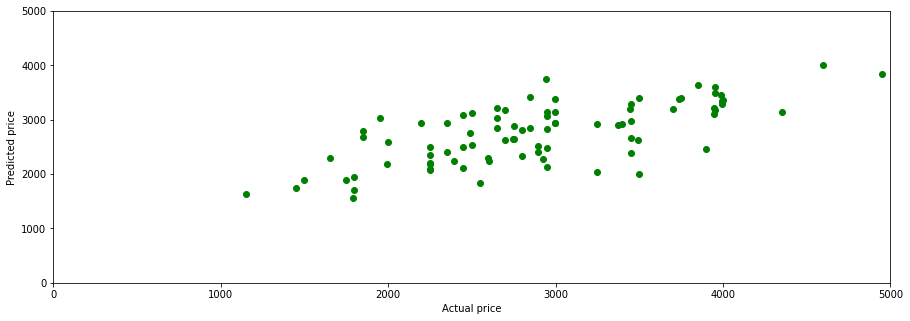

In [32]:
plt.figure(figsize=(15,5))
plt.scatter(y_test,y_pred,c='green')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.xlim(0, 5000)
plt.ylim(0, 5000)
plt.show()

In [33]:
joblib.dump(random_forest, 'RandomForestRegressor')
joblib.dump(preprocessor, 'RFPreprocessor')

['RFPreprocessor']